<a href="https://colab.research.google.com/github/Diego-CB/DS-Proyecto/blob/main/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud

In [50]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:

id = '1kzPayZj888s0RkHlxYHGXzHwdb63fEYH'
url = 'https://drive.google.com/uc?id=' + id
data = pd.read_csv(url)

In [52]:
data.shape

(36765, 5)

In [53]:
data.columns

Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type',
       'discourse_effectiveness'],
      dtype='object')

In [54]:
data.dtypes

discourse_id               object
essay_id                   object
discourse_text             object
discourse_type             object
discourse_effectiveness    object
dtype: object

In [55]:
data.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36765 entries, 0 to 36764
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   discourse_id             36765 non-null  object
 1   essay_id                 36765 non-null  object
 2   discourse_text           36765 non-null  object
 3   discourse_type           36765 non-null  object
 4   discourse_effectiveness  36765 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [57]:
data.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36765,36765,36765,36765,36765
unique,36765,4191,36691,7,3
top,0013cc385424,91B1F82B2CF1,Summer projects should be student-designed,Evidence,Adequate
freq,1,23,14,12105,20977


In [58]:
data.isnull().sum()

discourse_id               0
essay_id                   0
discourse_text             0
discourse_type             0
discourse_effectiveness    0
dtype: int64

In [59]:
data.corr()

<ipython-input-59-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


""


In [60]:
columns = data.columns
numeric_data = data._get_numeric_data().columns

categorical_data = set(columns) - set(numeric_data)
print("-> Columnas con valores numericos \n ",numeric_data ,'\n')
print("-> Columnas con valores categoricos\n ",categorical_data)

-> Columnas con valores numericos 
  Index([], dtype='object') 

-> Columnas con valores categoricos
  {'discourse_effectiveness', 'discourse_type', 'discourse_text', 'essay_id', 'discourse_id'}


Como todo el dataset es texto pues se busca trabajar con natural language processing tomaremos una ruta distinta para explorar los datos.

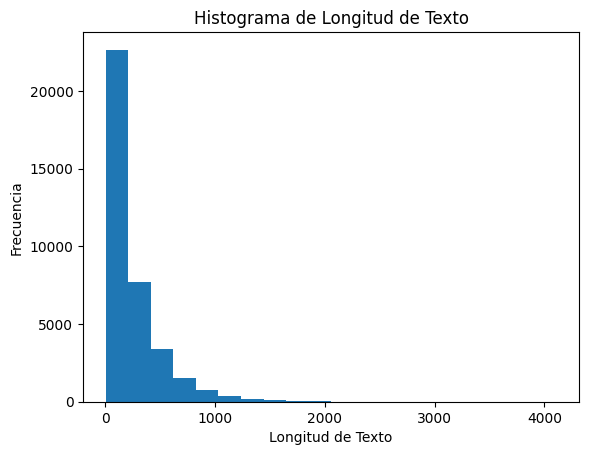

In [61]:
data['text_lenght'] = data['discourse_text'].apply(len)
plt.hist(data['text_lenght'], bins=20)  # Cambia el valor de bins según tus preferencias
plt.title('Histograma de Longitud de Texto')
plt.xlabel('Longitud de Texto')
plt.ylabel('Frecuencia')
plt.show()

In [62]:
texto_combinado = ' '.join(data['discourse_text'])
vocabulario = sorted(set(texto_combinado))

letras = [c for c in vocabulario if c.isalpha()]
numeros = [c for c in vocabulario if c.isdigit()]
especiales = [c for c in vocabulario if c not in string.ascii_letters + string.digits]

# Imprimir las categorías y sus contenidos
print("Letters:", ''.join(letras))
print("Numbers:", ''.join(numeros))
print("Especial Characters:", ''.join(especiales))
print("Vocab size:",len(vocabulario))

Letters: ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzÂÃËåþ
Numbers: 0123456789
Especial Characters: 
 !"#$%&'()*+,-./:;=>?@[\]^_`{|}~ ¢¨®°´ÂÃËåþ
Vocab size: 113


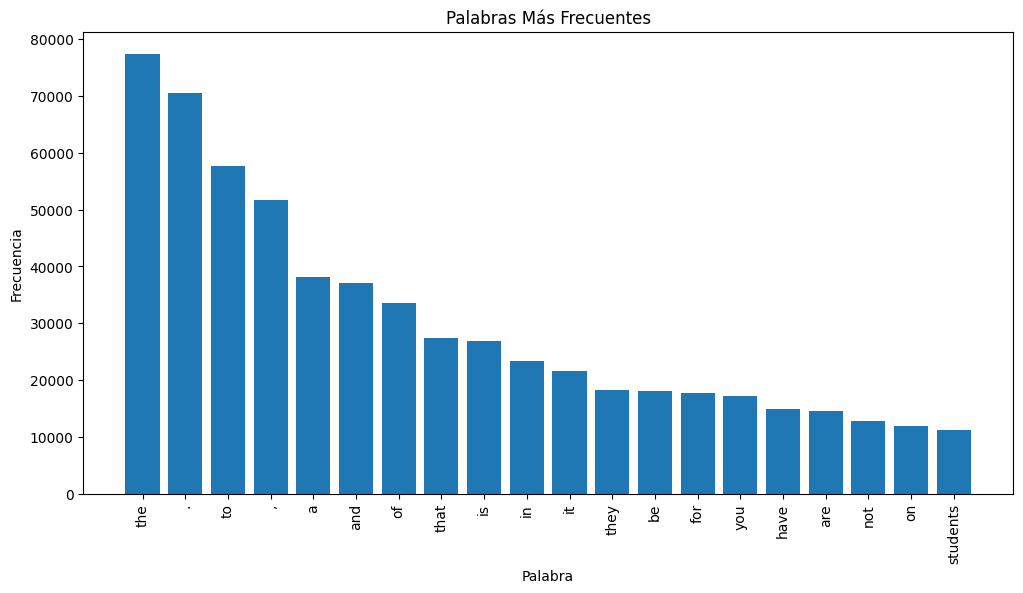

In [63]:
data['tokens'] = data['discourse_text'].apply(word_tokenize)
word_frequency = Counter(word for words in data['tokens'] for word in words)
most_common_words = word_frequency.most_common(20)  # Cambia el número según tus preferencias

# Separar las palabras y las frecuencias en listas separadas
words, frequencies = zip(*most_common_words)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.title('Palabras Más Frecuentes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Para rotar las etiquetas en el eje x
plt.show()

In [64]:
n = 2  # Número de palabras por n-grama (en este caso, bigramas)
data['bigrams'] = data['tokens'].apply(lambda x: list(ngrams(x, n)))

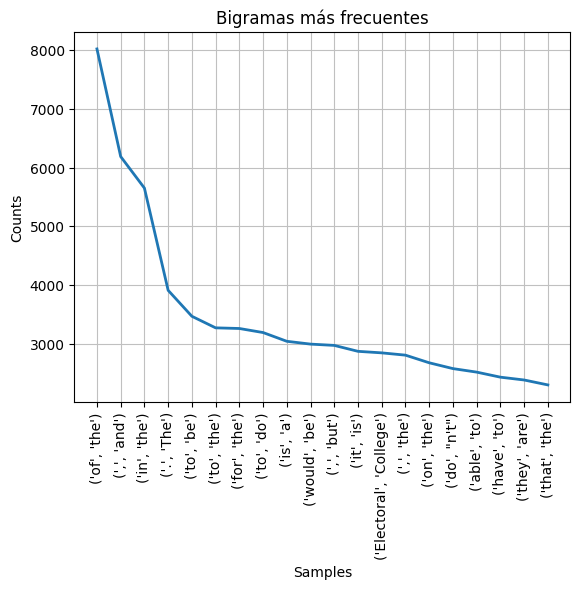

<Axes: title={'center': 'Bigramas más frecuentes'}, xlabel='Samples', ylabel='Counts'>

In [65]:
all_bigrams = [bigram for sublist in data['bigrams'] for bigram in sublist]

# Calcular la frecuencia de los bigramas
bigram_freq = nltk.FreqDist(all_bigrams)

# Graficar los 20 bigramas más frecuentes
bigram_freq.plot(20, title='Bigramas más frecuentes')

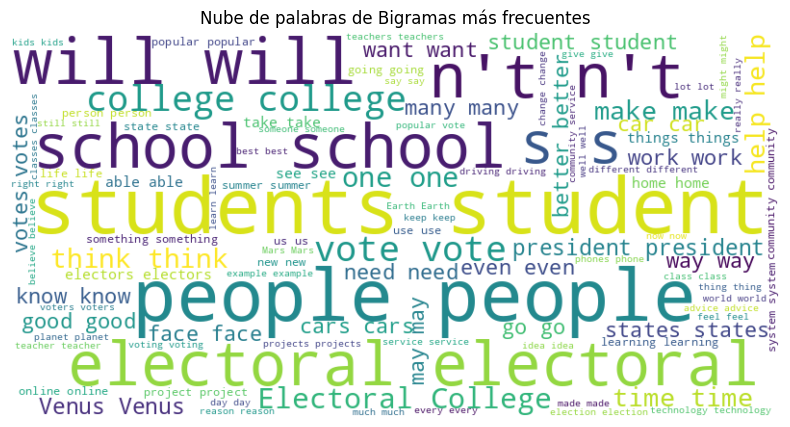

In [66]:
bigrams_text = ' '.join([' '.join(bigram) for bigram in all_bigrams])

# Crear una nube de palabras de los bigramas más frecuentes
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(bigrams_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de Bigramas más frecuentes')
plt.show()

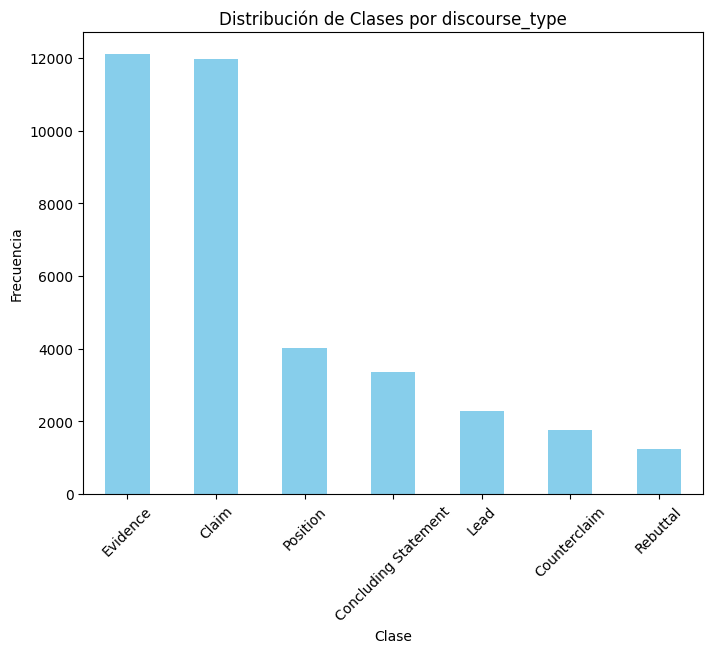

In [67]:
class_counts = data['discourse_type'].value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases por discourse_type')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

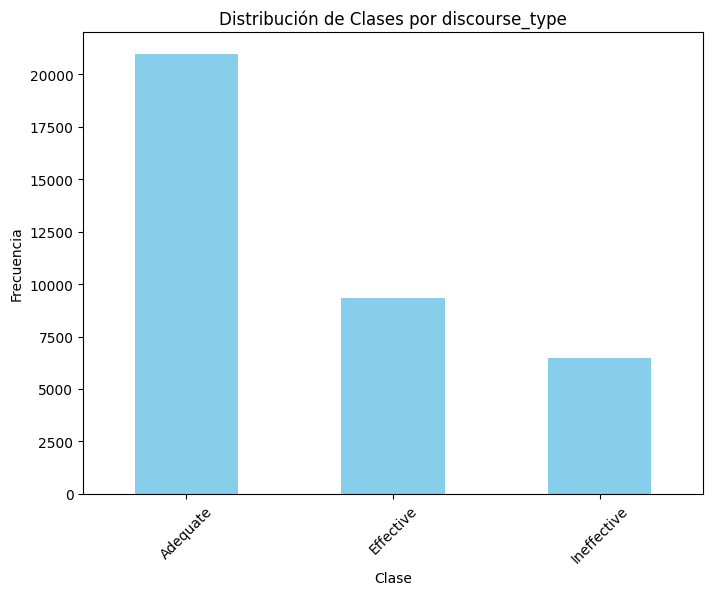

In [68]:
class_counts = data['discourse_effectiveness'].value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases por discourse_type')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

## Liempieza de dataset de entreno

Se eliminaran las columnas de discourse_id u essay_id debido a que estas son solo identificadores no relevantes para el modelo. AL contrario, podrian causar ruido que genere malas predicciones

In [69]:
data.drop('discourse_id', axis=1, inplace=True)
data.drop('essay_id', axis=1, inplace=True)

## Split de Datos

In [70]:
y = data['discourse_effectiveness']
X = data.copy()
X.drop('discourse_effectiveness', axis=1, inplace=True)

In [71]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train = sequence.pad_sequences(X_train, maxlen = 80)
X_test = sequence.pad_sequences(X_test, maxlen = 80)

ValueError: ignored

## Modelo

In [76]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM

modelo = Sequential()
modelo.add(Embedding(20000, 128))
modelo.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
modelo.add(Dense(1, activation='sigmoid'))
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2691713 (10.27 MB)
Trainable params: 2691713 (10.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
modelo.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [78]:
modelo.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs = 15,
    verbose = 2,
    validation_data = (X_test, y_test)
)

ValueError: ignored

In [79]:
X_train

,discourse_text,discourse_type,text_lenght,tokens,bigrams
3994,Its a very good sorce for people that have the...,Evidence,472,"[Its, a, very, good, sorce, for, people, that,...","[(Its, a), (a, very), (very, good), (good, sor..."
3069,Eveyone should have one of these or get an com...,Concluding Statement,151,"[Eveyone, should, have, one, of, these, or, ge...","[(Eveyone, should), (should, have), (have, one..."
4749,The NASA has talked about idea like sending hu...,Claim,67,"[The, NASA, has, talked, about, idea, like, se...","[(The, NASA), (NASA, has), (has, talked), (tal..."
34914,They will finish early and they start doing an...,Evidence,238,"[They, will, finish, early, and, they, start, ...","[(They, will), (will, finish), (finish, early)..."
2878,You could have fun,Claim,19,"[You, could, have, fun]","[(You, could), (could, have), (have, fun)]"
...,...,...,...,...,...
16850,So there is a possiblity that your not going t...,Evidence,100,"[So, there, is, a, possiblity, that, your, not...","[(So, there), (there, is), (is, a), (a, possib..."
6265,Its's worth it to study and learen about venus,Claim,47,"[Its, 's, worth, it, to, study, and, learen, a...","[(Its, 's), ('s, worth), (worth, it), (it, to)..."
11284,Your principal has decided that all students m...,Lead,223,"[Your, principal, has, decided, that, all, stu...","[(Your, principal), (principal, has), (has, de..."
860,"With advanced technology, the right location, ...",Evidence,209,"[With, advanced, technology, ,, the, right, lo...","[(With, advanced), (advanced, technology), (te..."
